In [3]:
# Customer Churn Analysis

#This notebook contains visual analysis of a telecom customer churn dataset using Seaborn and Matplotlib.
#We will explore different features to understand which factors contribute to customer churn.


In [4]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load dataset and initial cleaning
df = pd.read_csv('Customer Churn.csv')


# Convert TotalCharges to numeric, handling empty strings
df['TotalCharges'].replace(" ", "0", inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)

# Convert SeniorCitizen to categorical
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'}).astype('object')


C:\Users\nafay\AppData\Local\Temp\ipykernel_12104\985120538.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].replace(" ", "0", inplace=True)
C:\Users\nafay\AppData\Local\Temp\ipykernel_12104\985120538.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [6]:
## 1. Churn Distribution (Count and Percentage)


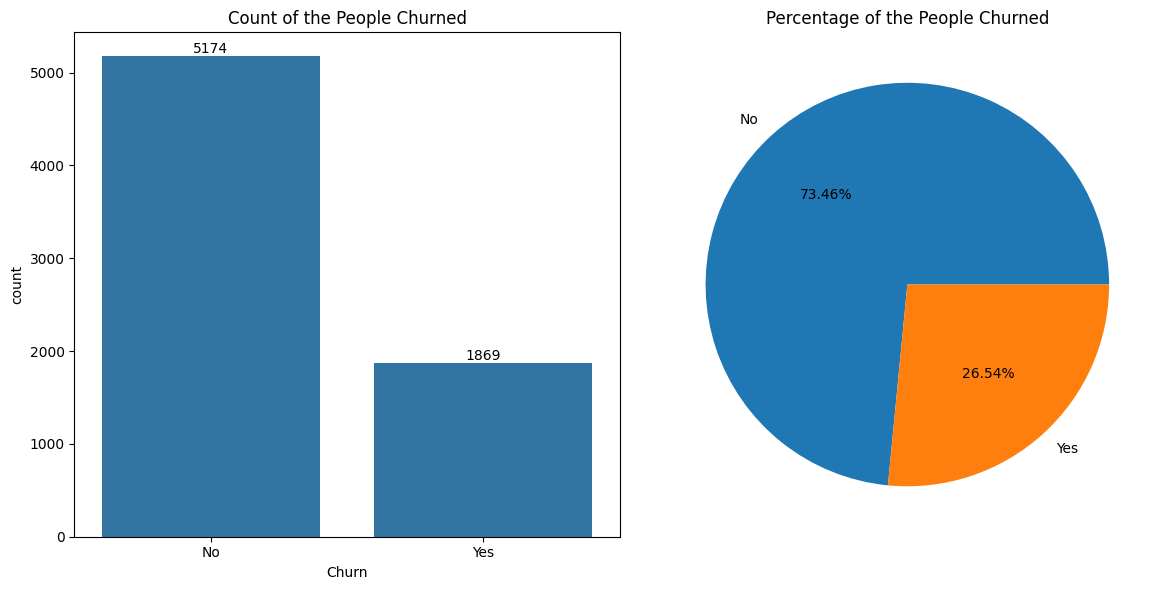

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Count of churned vs not churned
ax1 = sns.countplot(x='Churn', data=df, ax=axes[0])
axes[0].set_title('Count of the People Churned')
ax1.bar_label(ax1.containers[0])

# Pie chart for percentage
gb = df['Churn'].value_counts()
axes[1].pie(gb, autopct='%1.2f%%', labels=gb.index)
axes[1].set_title('Percentage of the People Churned')

plt.tight_layout()
plt.savefig('churn_count.png')
plt.show()

# Summary: Most customers stayed, but a significant proportion churned.

In [19]:
## 2. Churn by Senior Citizen Status


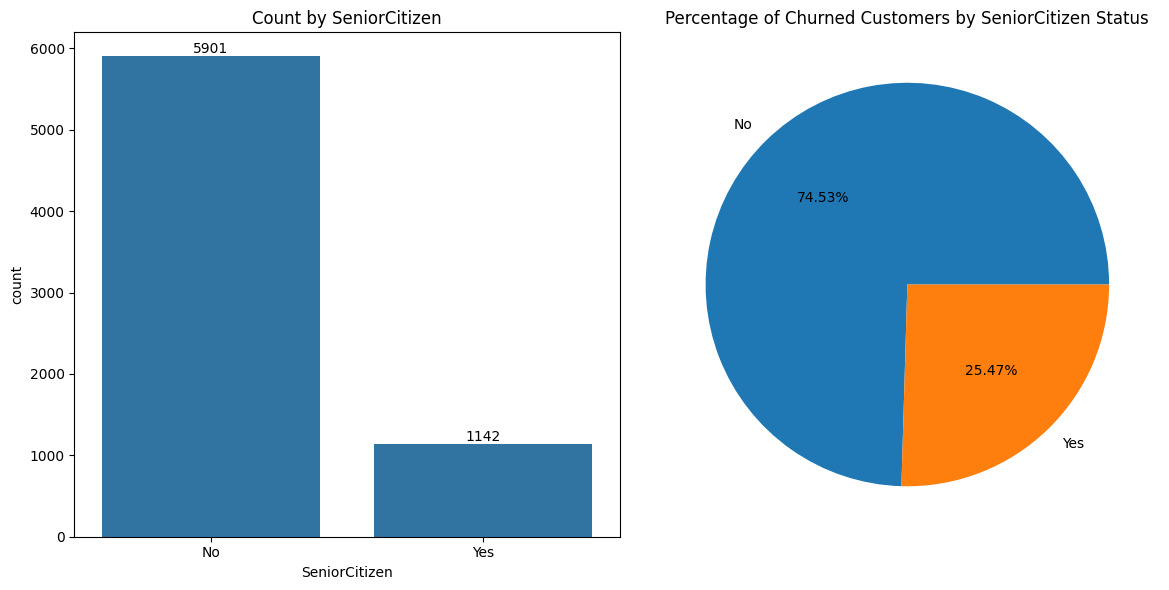

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot
ax1 = sns.countplot(x='SeniorCitizen', data=df, ax=axes[0])
ax1.bar_label(ax1.containers[0])
axes[0].set_title('Count by SeniorCitizen')

# Pie chart for churned only
churned = df[df['Churn'] == 'Yes']
gb = churned['SeniorCitizen'].value_counts()
axes[1].pie(gb, autopct='%1.2f%%', labels=gb.index)
axes[1].set_title('Percentage of Churned Customers by SeniorCitizen Status')

plt.tight_layout()
plt.savefig('Senior_citizen_churn.png')
plt.show()

# Summary: Senior citizens churn at a higher rate relative to their total population.

In [21]:
## 3. Churn Based on Tenure


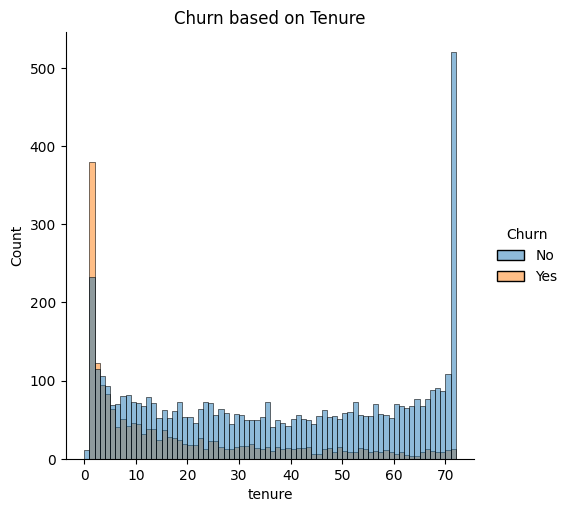

In [22]:
sns.displot(data=df, x='tenure', bins=72, hue='Churn')
plt.title('Churn based on Tenure')
plt.savefig('tenure_churn.png')
plt.show()
# Summary: Newer customers tend to churn more; loyal long-term users tend to stay.

In [23]:
## 4. Churn by Contract Type


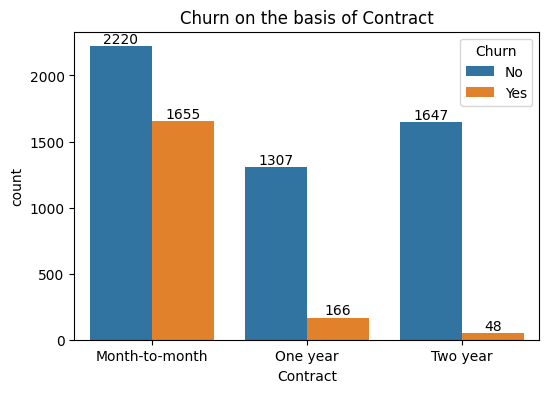

In [24]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Contract', data=df, hue='Churn')
plt.title('Churn on the basis of Contract')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.savefig('contract_churn.png')
plt.show()

# Summary: Month-to-month contracts see the highest churn.


In [25]:
## 5. Churn Analysis by Services Subscribed


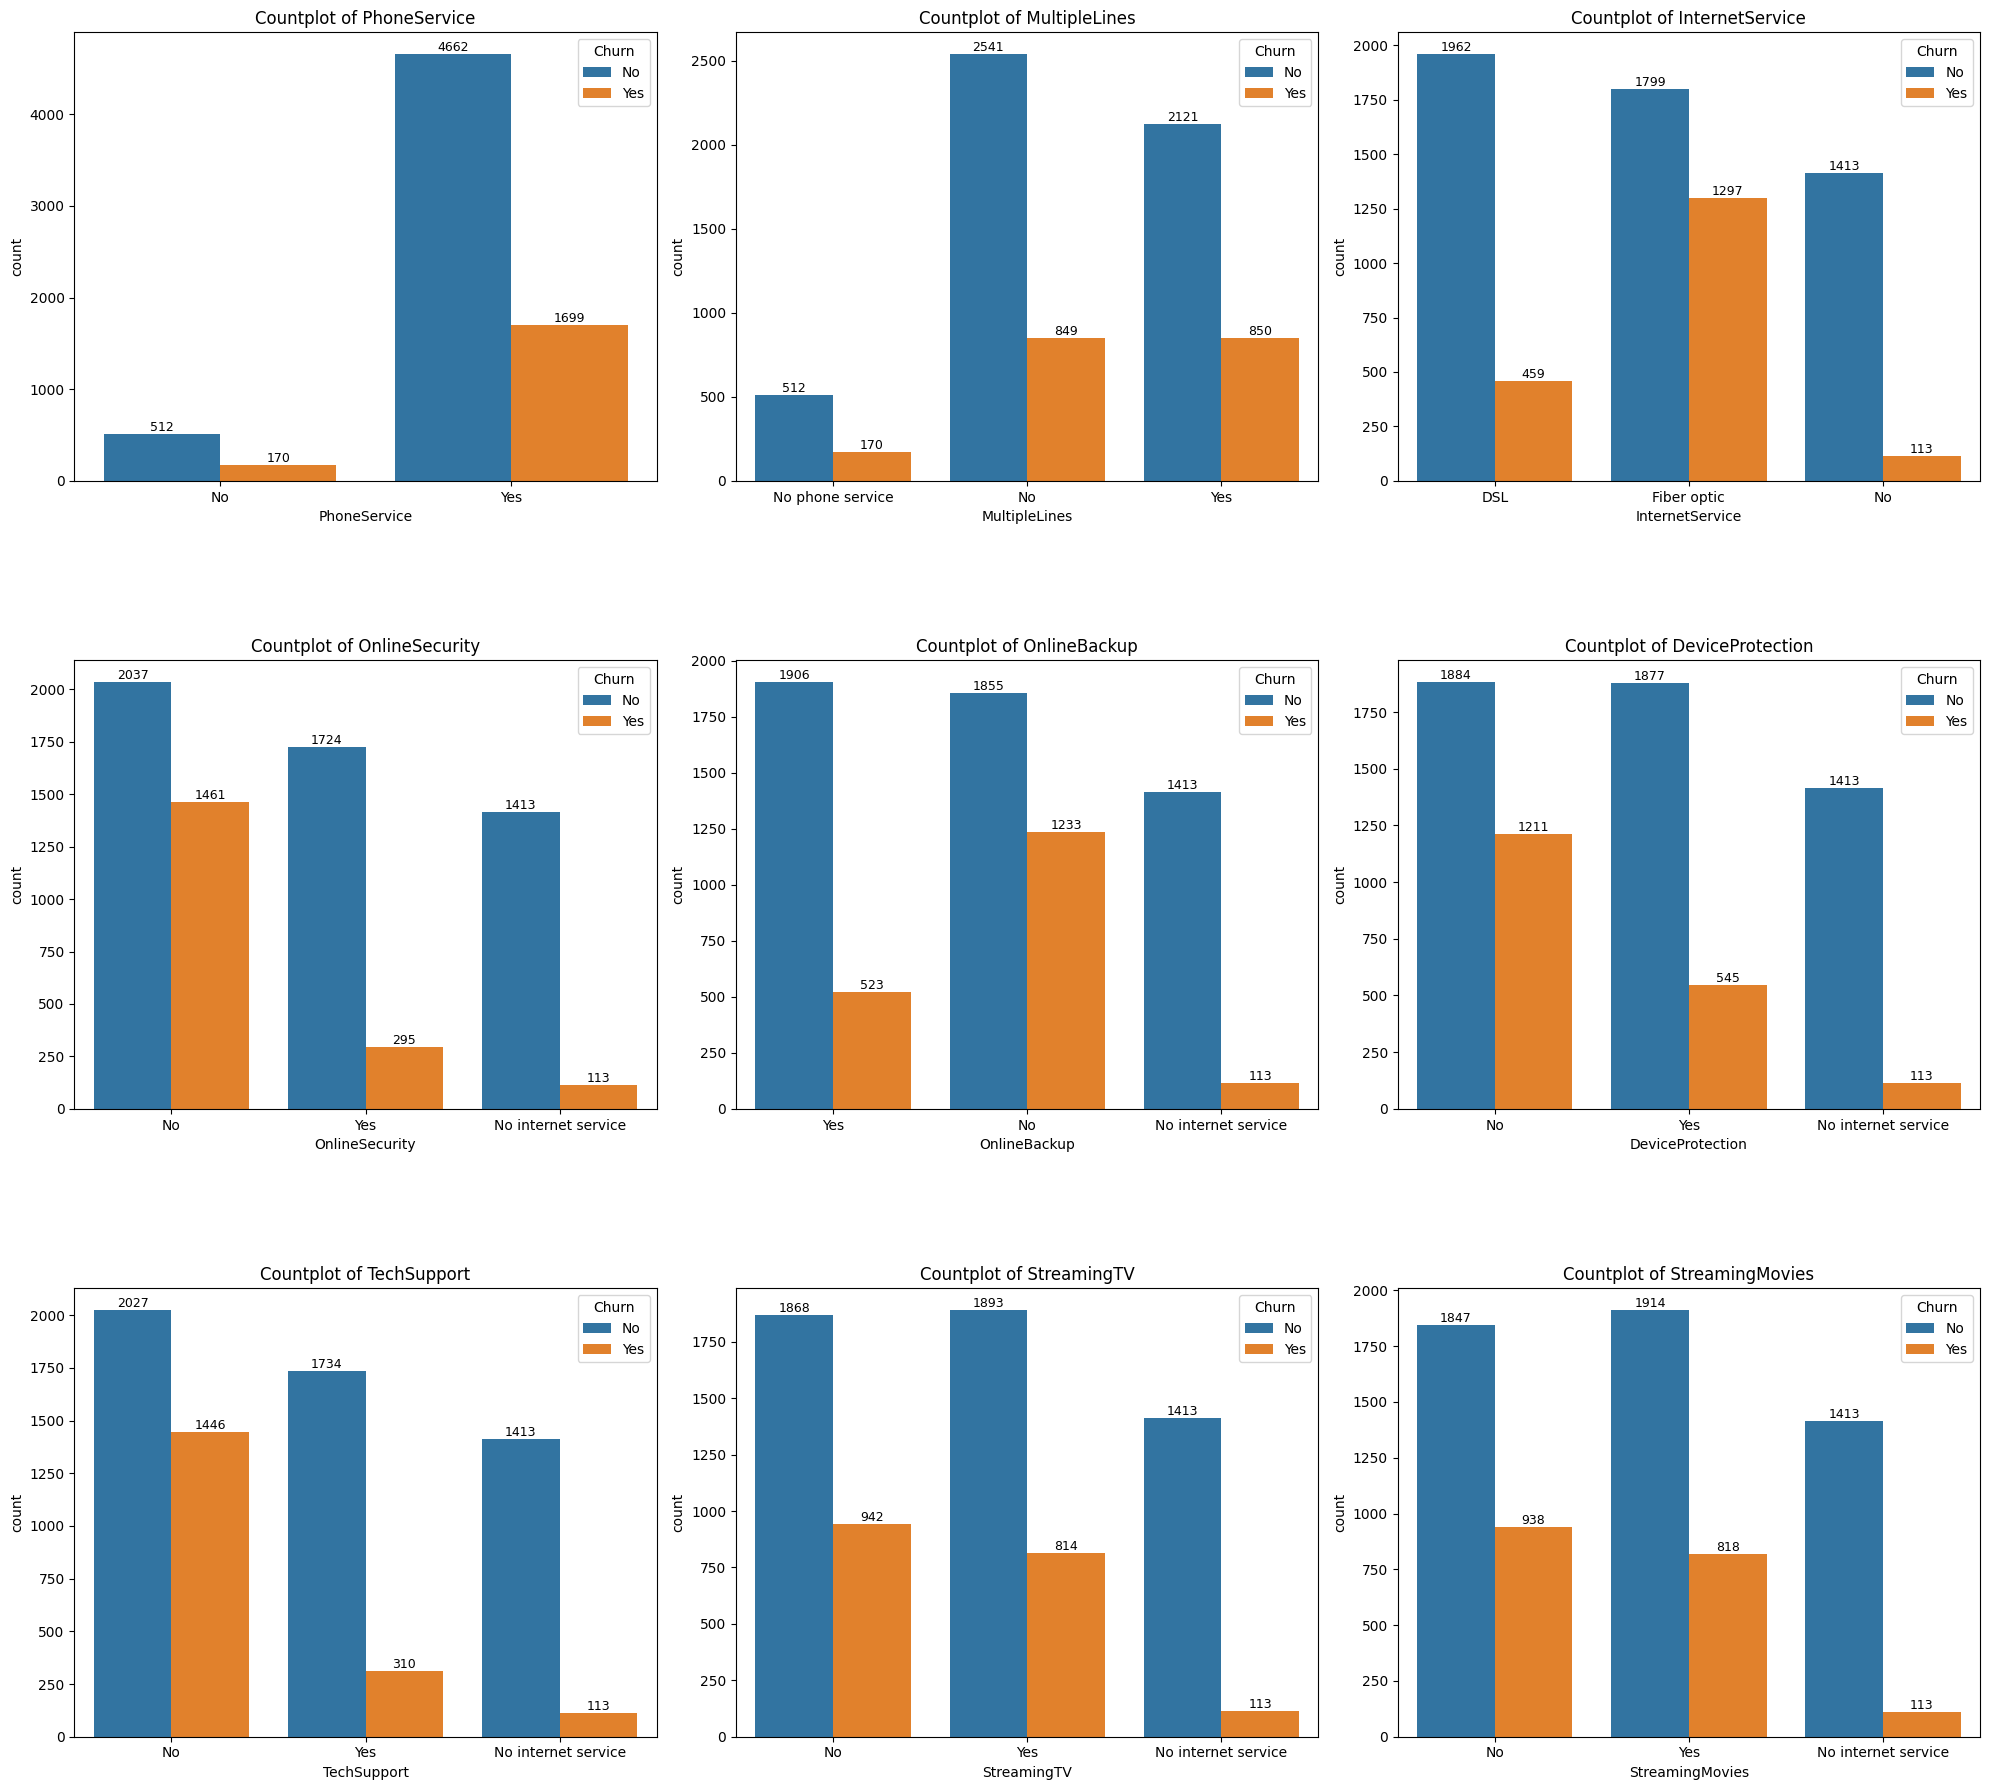

In [26]:
cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
n_col = 3
n_row = (len(cols) + n_col - 1) // n_col
fig, axes = plt.subplots(n_row, n_col, figsize=(20, n_row * 6))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    sns.countplot(data=df, x=col, hue='Churn', ax=ax)
    ax.set_title(f'Countplot of {col}')
    ax.tick_params(axis='x', rotation=0)
    for container in ax.containers:
        ax.bar_label(container, fontsize=9)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.savefig('services_based_churns.png')
plt.show()

# Summary: Services like TechSupport and OnlineSecurity show strong correlation with churn behavior.

In [27]:
## 6. Churn Based on Payment Method


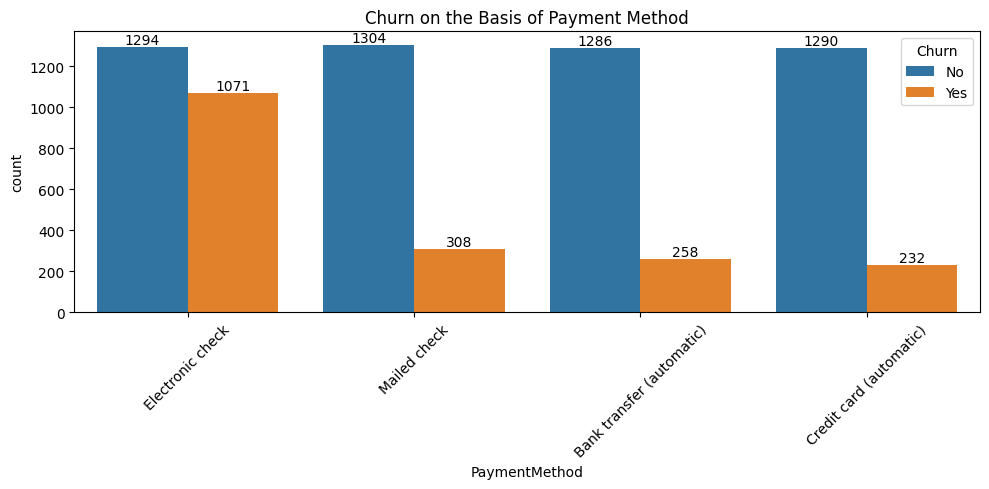

In [28]:
plt.figure(figsize=(10, 5)) 
ax = sns.countplot(x='PaymentMethod', data=df, hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churn on the Basis of Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('payment_method_churn.png')
plt.show()

# Summary: Electronic checks have a significantly higher churn rate than other payment methods.